<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Tutorial: Uso de Neurokit</font></b></h1>
        <h2><font color='0B5345'>Proyecto 2024-02</font></h2>
        <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Chingal</font></h3>
    </div>
</div>

## 1. Instalación

Abra su terminal y ejecute:

```python
pip install neurokit2

## 2. Importar módulo

Luego, en la parte superior de cada uno de sus scripts de Python, debería poder importar el módulo de la siguiente manera:

In [21]:
import neurokit2 as nk

Importar otros módulos necesarios para el tutorial

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# Imagen más grande
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

# Ignorar todos los warnings 
warnings.filterwarnings("ignore", category=UserWarning)  # Para warnings de tipo UserWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Para warnings de tipo RuntimeWarning

## 3. Conjunto de datos propio del módulo Neurokit

Descargue el conjunto de datos ubicado en el repositorio de GitHub.

In [23]:
data = nk.data("bio_resting_5min_100hz")

## Procesamiento de la señal

Para procesar las señales de ECG, utilizamos la función [**ecg_process()**](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process). Esta función no solo procesa las señales de ECG, sino que también calcula características relacionadas con la variabilidad de la frecuencia cardíaca (HRV).

Además, puedes visualizar tanto las señales de ECG como las características extraídas utilizando [**ecg_plot()**](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-plot).

### Frecuencia de Muestreo

Es importante especificar la frecuencia de muestreo de tu señal. En este caso, asignaremos una frecuencia de **100 Hz**.


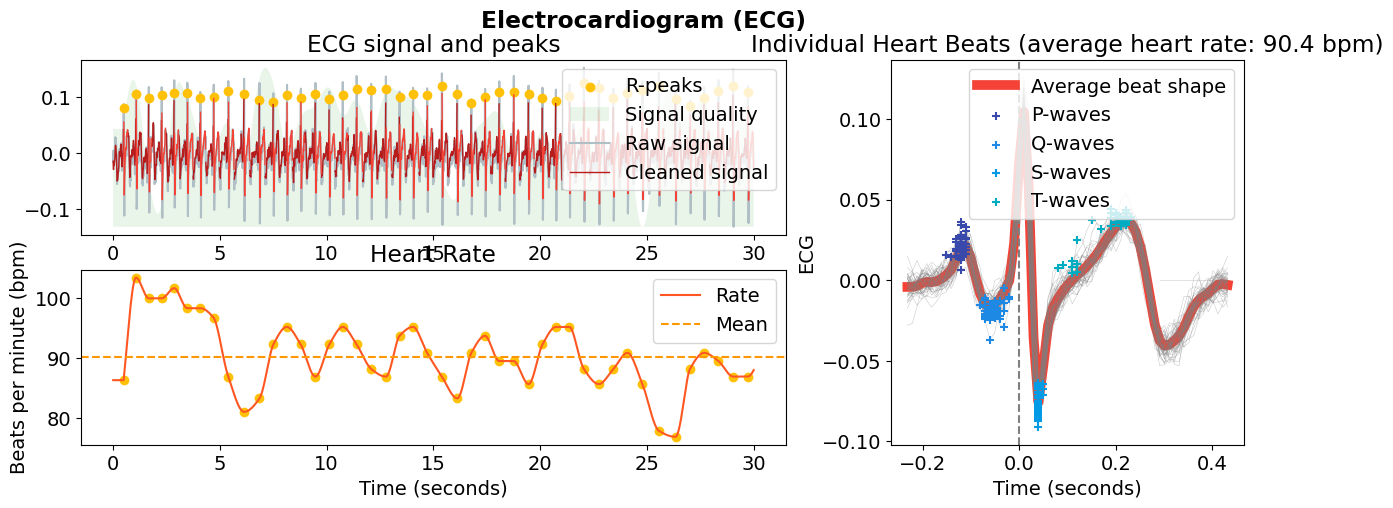

In [24]:
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)

nk.ecg_plot(ecg_signals[:3000], info)

## Extraer caracteristicas

Una vez que las señales estén procesadas, el siguiente paso es realizar el análisis para obtener características clave. Esto se logra mediante la función[ecg_intervalrelated()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-intervalrelated)  de Neurokit. Esta función analiza el conjunto de datos procesados y devuelve un conjunto de características relacionadas con los intervalos y la variabilidad de la señal.
### Proceso de Extracción
1. **Entrada**: Se le proporciona el conjunto de datos procesados (por ejemplo, el resultado de `nk.ecg_process()`).
2. **Salida**: Devuelve un nuevo DataFrame con múltiples características calculadas, incluyendo métricas relacionadas con la **frecuencia media** y la **variabilidad de la frecuencia cardíaca (HRV)**.

### Características Principales
- **Frecuencia Media**: Proporciona el promedio de la frecuencia cardíaca en latidos por minuto (BPM).
- **HRV**: Incluye métricas relacionadas con la variabilidad de la frecuencia cardíaca, como `HRV_SDNN` y `HRV_RMSSD`, que son útiles para evaluar la regularidad o la variabilidad entre intervalos consecutivos.
 

In [25]:
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,[[69.47563805104409]],[[4.903604322104105]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[3.8837766323814966]],...,[[1.9786368425578704]],[[4.256941017033136]],[[1.2686943754499123]],[[1.404137826745609]],[[1.469801247099329]],[[2.572679544052144]],[[1.562676080749381]],[[1.8465069301766717]],[[2.7223482404936066]],[[0.8731238852455482]]


## Detección de Picos R y Variabilidad de la Frecuencia Cardíaca (HRV)

Para analizar las señales de ECG, es crucial identificar los **picos R** en la señal. Esto se logra mediante la función [`ecg_peaks()`](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks). 

### Proceso de Detección de Picos
La función `ecg_peaks()` produce dos elementos:
1. **DataFrame**: Tiene la misma longitud que la señal de entrada. En este, las ocurrencias de los **picos R** se marcan con `1` en una lista de ceros.
2. **Diccionario**: Contiene los puntos de muestra específicos donde ocurren estos picos R, identificados con la clave `"ECG_R_Peaks"`.


In [26]:
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

## Análisis en el Dominio del Tiempo

El análisis en el dominio del tiempo es una de las aproximaciones más comunes para evaluar la **variabilidad de la frecuencia cardíaca (HRV)**. A continuación, extraeremos los índices más relevantes.

### ¿Qué son los índices en el dominio del tiempo?
Estas características incluyen métricas estadísticas que describen las variaciones entre intervalos **RR** consecutivos. Algunas de las más importantes son:

- **RMSSD**: Raíz cuadrada de la media de la suma de las diferencias sucesivas entre intervalos RR adyacentes. Es un indicador de la actividad parasimpática.
- **MeanNN**: Media de los intervalos RR, útil para analizar la frecuencia cardíaca promedio durante el período medido.


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,60.0,0.891502,660.0,740.0,14.651163,49.302326,470.0,1420.0,7.962963,234.375


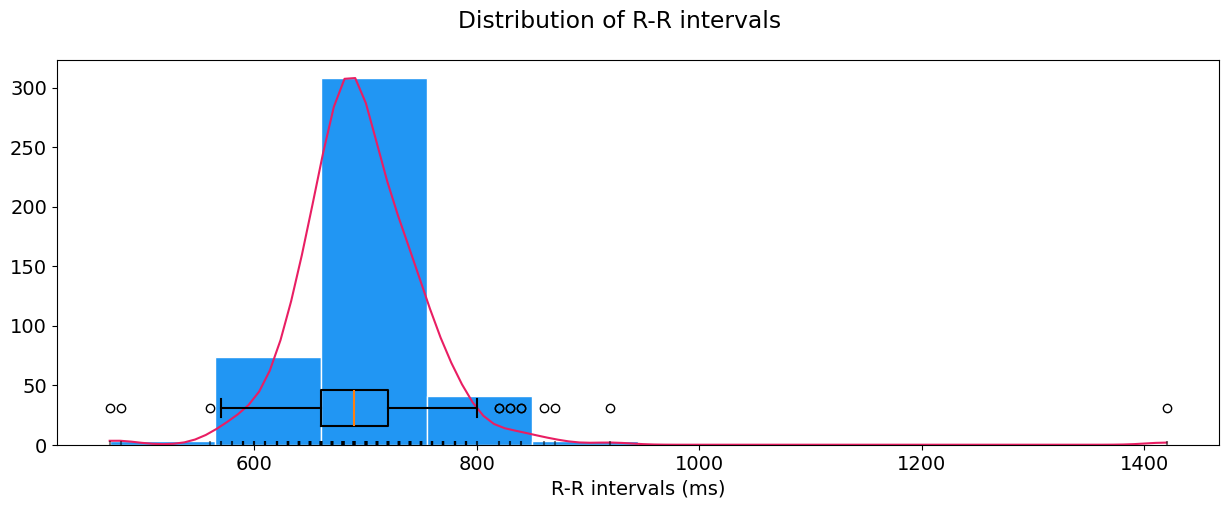

In [27]:
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

## Análisis en el Dominio de la Frecuencia

El análisis en el dominio de la frecuencia permite evaluar cómo se distribuye la **variabilidad de la frecuencia cardíaca (HRV)** en distintas bandas de frecuencia. Esto es útil para analizar la influencia del sistema nervioso autónomo sobre el corazón.

### Características del Dominio de la Frecuencia
Estas características se obtienen calculando la densidad de potencia espectral de la señal, que se distribuye en diferentes bandas de frecuencia:
- **VLF (Very Low Frequency)**: Asociada con factores fisiológicos como la termorregulación.
- **LF (Low Frequency)**: Relacionada con la actividad simpática y parasimpática.
- **HF (High Frequency)**: Indicadora de la actividad parasimpática y de la respiración.


,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,0.01731,0.048026,0.060232,0.011186,0.136754,0.797353,0.351186,0.44044,-2.809554


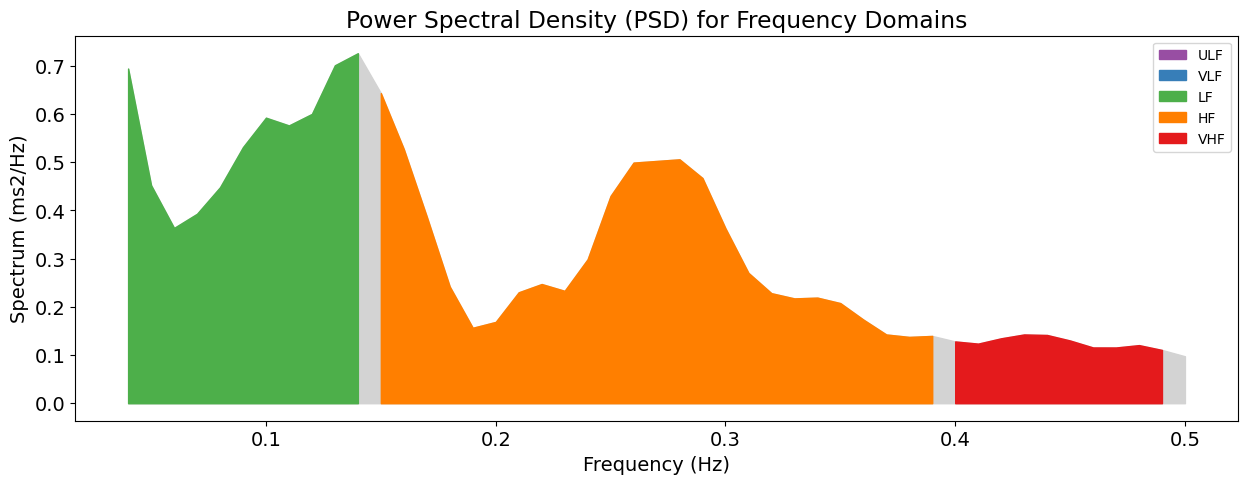

In [28]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True, normalize=True)
hrv_freq

## 4. Conjunto de datos de ejemplo

Obtenga el conjunto de datos para un sujeto

In [29]:
# Ruta donde están los archivos de señales ECG
data_path = r"C:\Users\luisa\Downloads\ECGDataDenoised\ECGDataDenoised"

# Nombre del archivo del sujeto a procesar
subject_file = 'MUSE_20180113_171327_27000.csv'

# Ruta del archivo CSV
data_subject= os.path.join(data_path, subject_file)

# Definir las columnas esperadas
columns = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Cargar el archivo CSV con las columnas especificadas
df = pd.read_csv(data_subject, delimiter=',', names=columns)

# Asegurarse de que la columna 'II' está presente
if 'II' not in df.columns:
    raise ValueError(f"La columna 'II' no se encuentra en el archivo {subject_file}")

# Extraer la derivación II (la señal original)
signal = df['II'].to_numpy()  # Almacenar como un array de numpy



## Procesamiento de la señal

Para procesar las señales de ECG, utilizamos la función [**ecg_process()**](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-process).

Además, esta señal tiene una frecuencia de muestreo de 500Hz, por lo que se asigna este valor.

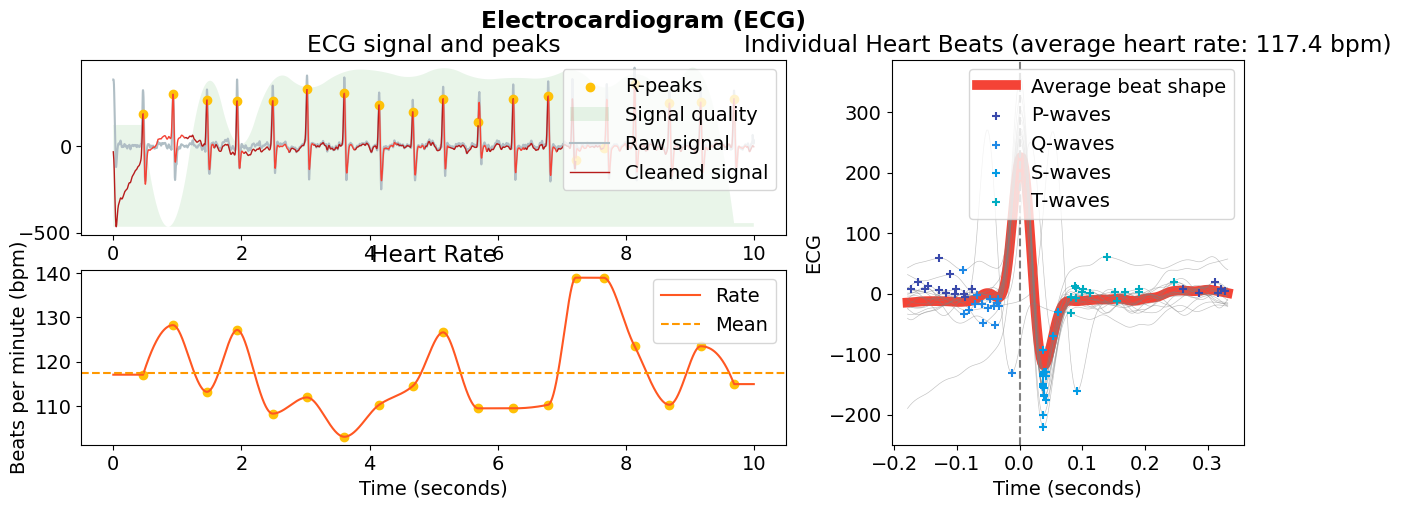

In [30]:
ecg_Signals_Process, infoProcess = nk.ecg_process(signal, sampling_rate=500)
nk.ecg_plot(ecg_Signals_Process[:5000], infoProcess)

## Detección de Picos R y Variabilidad de la Frecuencia Cardíaca (HRV)

In [31]:
Peaks, infopeaks = nk.ecg_peaks(signal, sampling_rate=500)

## Análisis en el dominio del Tiempo

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,512.555556,51.090718,NaN,NaN,NaN,NaN,NaN,NaN,81.263551,83.70519,...,65.5,0.628704,472.4,545.2,50.0,83.333333,378.0,582.0,6.0,93.75


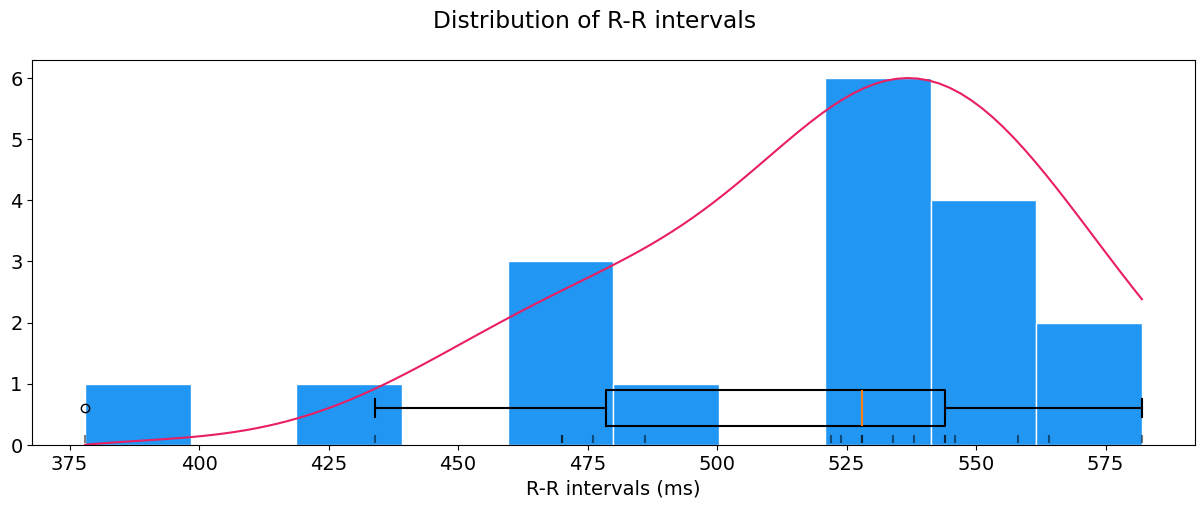

In [32]:
hrv_time_ = nk.hrv_time(Peaks, sampling_rate=500, show=True)
hrv_time_

## Extracción de Características Clave para el Sujeto

### 1. Ventricular rate in beats per minute (BPM)

In [33]:
R_peaks = infoProcess['ECG_R_Peaks']  # Índices de los picos R

# Calcular los intervalos RR (diferencia entre picos R consecutivos)
RR_intervals = np.diff(R_peaks)  # Diferencia entre picos R consecutivos

# Convertir los intervalos RR a segundos, asumiendo una tasa de muestreo (sampling_rate)
sampling_rate = 500  # Tasa de muestreo, por ejemplo 500 Hz
RR_intervals_sec = RR_intervals / sampling_rate  # Intervalos RR en segundos

# Calcular la frecuencia ventricular (latidos por minuto)
VentricularRate = 60 / RR_intervals_sec  # Frecuencia ventricular en bpm (latidos por minuto)

# Promedio de la frecuencia ventricular
VentricularRate = np.mean(VentricularRate)  # Promedio de la frecuencia ventricular

print("VentricularRate:", VentricularRate)

VentricularRate: 117.91378265105628


### 2. Atrial rate in BPM 

In [34]:
# Paso 1: Asegurarse de que los picos P sean un arreglo de NumPy
p_peaks = np.array(infoProcess['ECG_P_Peaks'])  # Convierte a NumPy si no es ya un array

# Paso 2: Filtrar NaNs 
p_peaks_cleaned = p_peaks[~np.isnan(p_peaks)]  # Limpiar los valores NaN

# Paso 3: Calcular los intervalos PP
pp_intervals = np.diff(p_peaks_cleaned)/500  # Convertir de muestras a segundos (suponiendo tasa de muestreo de 500 Hz)

# Paso 4: Calcular la tasa atrial (Atrial Rate)
atrial_rate = 60 / np.mean(pp_intervals)  # Frecuencia en latidos por minuto (bpm)

# Mostrar el Atrial Rate
print("Atrial Rate:", atrial_rate)

Atrial Rate: 110.06649850951615


### 3. QRSCount

In [35]:
#El número de picos R es equivalente al número de complejos QRS, ya que cada pico R indica el final de un ciclo QRS.
QRS_count = len(infoProcess['ECG_R_Peaks'])

# Mostrar QRSCount
print("QRSCount:", QRS_count)

QRSCount: 19


### 4. IntervalRR

In [36]:
# Verificar los picos R detectados (accedemos a la clave "ECG_R_Peaks" en el diccionario 'info')
peaksR = infoProcess["ECG_R_Peaks"]

# Filtrar los valores NaN en el array de NumPy (usando np.isnan para eliminar NaNs)
peaksR_cleaned = peaksR[~np.isnan(peaksR)]  # Eliminamos los valores NaN de los picos R

# Calcular los intervalos RR (en segundos)
# np.diff calcula las diferencias entre los picos R consecutivos. Dividimos por la tasa de muestreo (500 Hz) para obtener segundos.
rr_intervals = np.diff(peaksR_cleaned) / 500  

# Calcular el promedio de los intervalos RR
interval_RR = np.mean(rr_intervals)

# Mostrar los intervalos RR 
print("IntervalRR:", interval_RR)


IntervalRR: 0.5125555555555557


### 5. TOffset

In [38]:
# Acceder a los momentos de finalización de la onda T (T_Offsets)
t_offsets = np.array(infoProcess["ECG_T_Offsets"])  # Convertir a un array de NumPy

# Limpiar los valores eliminando NaN o valores inconsistentes
t_offsets_cleaned = t_offsets[~np.isnan(t_offsets)]  # Eliminar valores NaN
t_offsets_cleaned = t_offsets_cleaned[t_offsets_cleaned > 0]  # Asegurarse de que sean positivos

sampling_rate = 500  # Frecuencia de muestreo en Hz
t_offsets_sec = t_offsets_cleaned / sampling_rate  # Convertir a segundos

# Calcular estadísticas básicas
t_mean = np.mean(t_offsets_cleaned)
t_offsets_avg = np.mean(t_offsets_sec)  # Promedio de T_Offsets en segundos

# Imprimir los resultados
print("Promedio de T_Offsets (en segundos):", t_offsets_avg)



Promedio de T_Offsets (en segundos): 5.399647058823528


### 6. Phase Ventricular Systolic

In [ ]:
# Extraer la fase ventricular del DataFrame
ventricular_phase = ecg_Signals_Process["ECG_Phase_Ventricular"].values

# Limpiar los datos de NaN o valores no válidos
ventricular_phase_cleaned = ventricular_phase[~np.isnan(ventricular_phase)]

# Crear dos variables separadas para sístole (1)
systole_phase = ventricular_phase_cleaned[ventricular_phase_cleaned == 1]  # Sístole (fase 1)

# Obtener estadísticas básicas de cada fase
systole_count = len(systole_phase)

# Imprimir resultados 
print("PhaseVentricularSystolic:", systole_count)


PhaseVentricularSystolic: 1852


### 7. Phase Ventricular Diastolic

In [40]:
diastole_phase = ventricular_phase_cleaned[ventricular_phase_cleaned == 0]  # Diástole (fase 0)
diastole_count = len(diastole_phase)
print("PhaseVentricularDiastolic:", diastole_count)

PhaseVentricularDiastolic: 2860
